In [20]:
import os
import sys
sys.path.append(os.path.abspath('..'))
from plot import plot_learning_perturbation, plot_learning
import matplotlib.pyplot as plt
from get_utils import get_loss
import numpy as np
import seaborn as sb
from utils import modelLoss
import pandas as pd


#%matplotlib qt
#%matplotlib widget
%matplotlib inline


fontsize_label = 18
fontsize_tick = 15
fontsize_legend = 20

base_dir = os.path.join(os.path.expanduser('~'),'Documents','Data','MotorNet')
save_fig = '/Users/mahdiyar/Diedrichsenlab Dropbox/Mahdiyar Shahbazi/Conferences/NCM2024_Mahdiyar/figures'

def create_dataframe(idx, siz, loss_type):
    data = []
    for p in list(idx.keys()):
        val = idx[p]
        data.extend([
            {'mn': i + 1, 'phase': p, 'value': v, 'size': siz, 'lt': loss_type}
            for i, v in enumerate(val)
        ])
    return pd.DataFrame(data)

In [2]:
# Load loss
phases = {'NF1':[0],'FF1':[8],'NF2':[0],'FF2':[8]}
palette_colors = {'FF1': 'g', 'FF2': 'r', 'NF1': 'k', 'NF2': 'k'}
num_model = 40
ignore = [19]
target = None
loss_type = 'lateral'

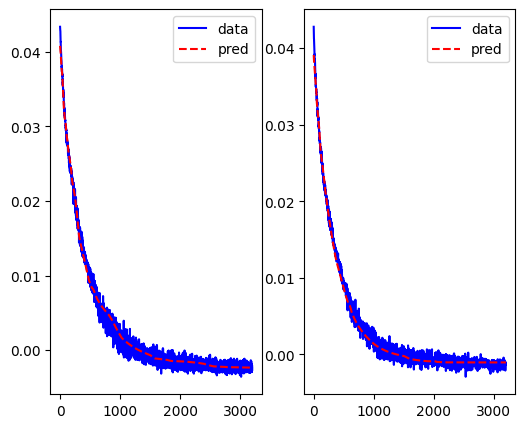

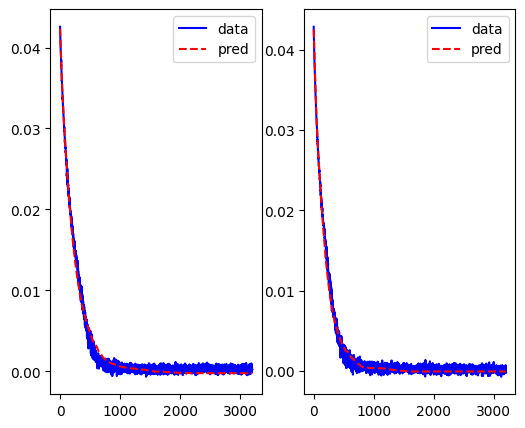

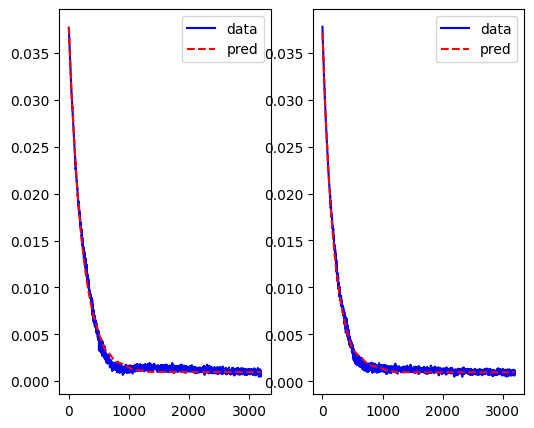

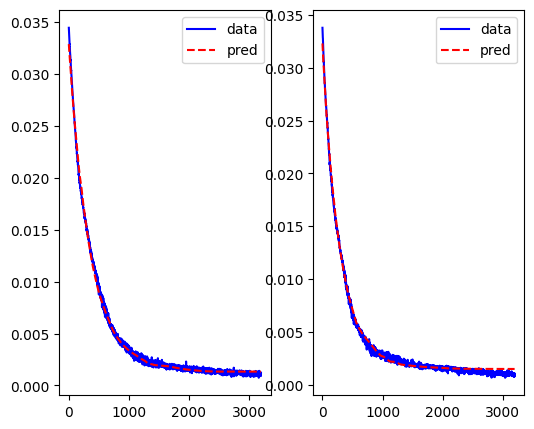

In [21]:
T = pd.DataFrame()
L = pd.DataFrame()

for s in [16,32,64,128]:

    folder_name = f'Sim_simp_{s}'
    loss = get_loss(folder_name,num_model,phases,loss_type=loss_type,w=1,ignore=ignore,target=target)

    # get initial loss
    data1 = {'NF1':[],'FF1':[],'NF2':[],'FF2':[]}
    for p in list(data1.keys()):
        index=0
        if p=='NF1' or p=='NF2':
            index=-1
        data1[p] = list(np.array(loss[p])[:,index])

    # Fit data
    data2 = {'FF1':[],'FF2':[]}
    pred = {'FF1':[],'FF2':[]}
    for m in range(len(loss['FF1'])):
        for i,phase in enumerate(data2.keys()):
            l = loss[phase][m]
            model = modelLoss()
            model.fit(l,lam=0.0,theta0=[np.log(0.03),np.log(0.03),0])

            pred[phase].append(model.predict())
            data2[phase].append(model.get_rate())
    
    # Check the fits
    fig,ax = plt.subplots(1,2,figsize=(6,5))
    ax[0].plot(np.median(loss['FF1'],axis=0),linestyle='-',color='b',label='data')
    ax[0].plot(np.median(pred['FF1'],axis=0),linestyle='--',color='r',label='pred')
    ax[0].legend()

    ax[1].plot(np.median(loss['FF2'],axis=0),linestyle='-',color='b',label='data')
    ax[1].plot(np.median(pred['FF2'],axis=0),linestyle='--',color='r',label='pred')
    ax[1].legend()
    plt.show()

    T = pd.concat([T, create_dataframe(data1, s, loss_type)], ignore_index=True)
    L = pd.concat([L, create_dataframe(data2, s, loss_type)], ignore_index=True)

T.to_csv(base_dir+'/loss_init.csv',index=False)
L.to_csv(base_dir+'/loss_rate.csv',index=False)

# Plot #1: Learning all phases - only for 128

In [ ]:
folder_name = f'Sim_simp_{128}'
loss = get_loss(folder_name,num_model,phases,loss_type=loss_type,w=1,ignore=ignore,target=target)

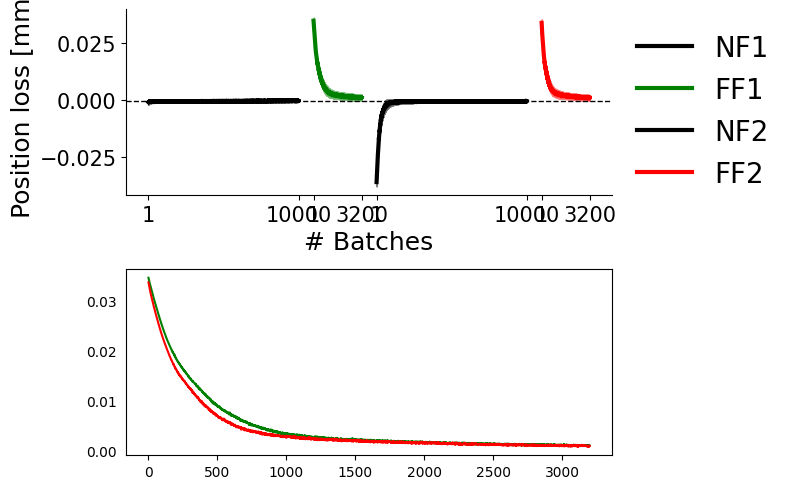

In [26]:
fig, ax = plot_learning(loss,figsize=(8,5),show_saving=True,gap=1000,palette_colors=palette_colors)


ax[0].set_xlabel('# Batches', fontsize = fontsize_label)
ax[0].set_ylabel('Position loss [mm]', fontsize = fontsize_label)
ax[0].legend(title = '',frameon = False, bbox_to_anchor= (1,1), fontsize=fontsize_legend)
ax[0].xaxis.set_tick_params(labelsize=fontsize_tick)
ax[0].yaxis.set_tick_params(labelsize=fontsize_tick)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
plt.tick_params(left = False) 

plt.tight_layout()
plt.show()

#fig.savefig(os.path.join(save_fig,'bahav_saving.pdf'),dpi=300,bbox_inches='tight')

# Plot #2: initial value of loss - only for 128

Text(0, 0.5, 'loss')

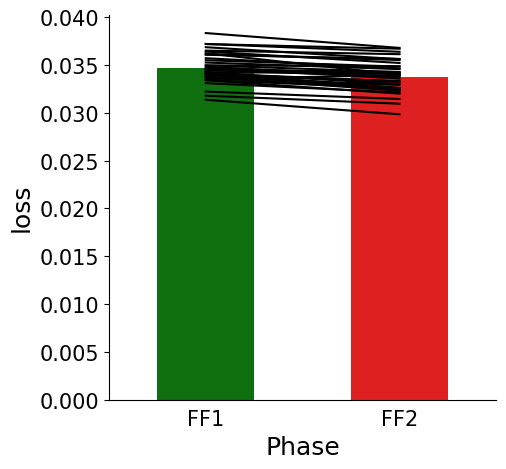

In [22]:
# plot saving for FF1 and FF2
T = pd.read_csv(base_dir+'/loss_init.csv')
D = T[T['phase'].isin(['FF1', 'FF2']) & (T['size']==128)]

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for id, data in D.groupby('mn'):
    ff1_value = data[data['phase'] == 'FF1']['value'].values[0]
    ff2_value = data[data['phase'] == 'FF2']['value'].values[0]
    ax.plot(['FF1', 'FF2'], [ff1_value, ff2_value], color='k')


sb.barplot(x='phase', y='value', data=D, hue='phase', width=0.5, ax=ax, palette=palette_colors,errorbar=None)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.xaxis.set_tick_params(labelsize=fontsize_tick)
ax.yaxis.set_tick_params(labelsize=fontsize_tick)

ax.tick_params(bottom=False)
ax.set_xlabel('Phase', fontsize=fontsize_label)
ax.set_ylabel('loss', fontsize=fontsize_label)

#ax.set_ylim([32, 41])  # Adjust based on your data
#ax.set_ylim([0.025, 0.05])
#fig.savefig(os.path.join(save_fig, 'savingFF2neg_batch0.pdf'), dpi=300, bbox_inches='tight')

#  Plot #2: Learning rate - for 128

Text(0, 0.5, 'LR')

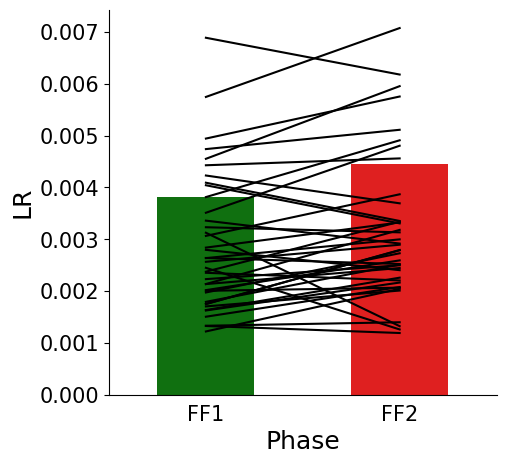

In [24]:
L = pd.read_csv(base_dir+'/loss_rate.csv')
D = L[L['phase'].isin(['FF1', 'FF2']) & (L['size']==128)]


fig, ax = plt.subplots(1, 1, figsize=(5, 5))


for id, data in L.groupby('mn'):
    ff1_value = data[data['phase'] == 'FF1']['value'].values[0]
    ff2_value = data[data['phase'] == 'FF2']['value'].values[0]
    ax.plot(['FF1', 'FF2'], [ff1_value, ff2_value], color='k')


sb.barplot(x='phase', y='value', data=L, hue='phase', width=0.5, ax=ax, palette=palette_colors,errorbar=None)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_tick_params(labelsize=fontsize_tick)
ax.yaxis.set_tick_params(labelsize=fontsize_tick)

ax.tick_params(bottom=False)
ax.set_xlabel('Phase', fontsize=fontsize_label)
ax.set_ylabel('LR', fontsize=fontsize_label)